# Introducción a la series de tiempo

El siguiente cuaderno tiene como objetivo introducir al lector al manejo básico de las series de tiempo en python.

Las librerías necesarias son:
  * pandas
  * matplotlib



In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = r"C:\Users\Angel Resendiz Plata\OneDrive\Documentos\Programación\4Geeks\Guía programa\23.- Time Series Forecasting\Ejercicios\Datos\acea-water-prediction\Aquifer_Petrignano.csv"

In [6]:
df = pd.read_csv(url)

In [7]:
df2 = df.copy()
df2

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [8]:
# Contar NaN por columna
print("\n--- Conteo de NaN ---")
print(df2.isnull().sum())

# Contar 0 por columna
print("\n--- Conteo de 0 ---")
print(df.eq(0).sum())


--- Conteo de NaN ---
Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

--- Conteo de 0 ---
Date                                       0
Rainfall_Bastia_Umbra                   3147
Depth_to_Groundwater_P24                   0
Depth_to_Groundwater_P25                   0
Temperature_Bastia_Umbra                   7
Temperature_Petrignano                   153
Volume_C10_Petrignano                     30
Hydrometry_Fiume_Chiascio_Petrignano     150
dtype: int64


In [9]:
columnas_a_eliminar = ["Rainfall_Bastia_Umbra", 
                       "Temperature_Bastia_Umbra", 
                       "Temperature_Petrignano",
                       "Volume_C10_Petrignano",
                       "Hydrometry_Fiume_Chiascio_Petrignano"]
df2 = df.drop(columns=columnas_a_eliminar, axis=1)

In [10]:
# Contar NaN por columna
print("\n--- Conteo de NaN ---")
print(df2.isnull().sum())

# Contar 0 por columna
print("\n--- Conteo de 0 ---")
print(df2.eq(0).sum())


--- Conteo de NaN ---
Date                         0
Depth_to_Groundwater_P24    55
Depth_to_Groundwater_P25    39
dtype: int64

--- Conteo de 0 ---
Date                        0
Depth_to_Groundwater_P24    0
Depth_to_Groundwater_P25    0
dtype: int64


In [11]:
df2 = df2.dropna(subset=['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25'])

In [12]:
# Contar NaN por columna
print("\n--- Conteo de NaN ---")
print(df2.isnull().sum())

# Contar 0 por columna
print("\n--- Conteo de 0 ---")
print(df2.eq(0).sum())


--- Conteo de NaN ---
Date                        0
Depth_to_Groundwater_P24    0
Depth_to_Groundwater_P25    0
dtype: int64

--- Conteo de 0 ---
Date                        0
Depth_to_Groundwater_P24    0
Depth_to_Groundwater_P25    0
dtype: int64


In [13]:
df2

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25
0,14/03/2006,-22.48,-22.18
1,15/03/2006,-22.38,-22.14
2,16/03/2006,-22.25,-22.04
3,17/03/2006,-22.38,-22.04
4,18/03/2006,-22.60,-22.04
...,...,...,...
5218,26/06/2020,-25.68,-25.07
5219,27/06/2020,-25.80,-25.11
5220,28/06/2020,-25.80,-25.19
5221,29/06/2020,-25.78,-25.18


In [14]:
df2.dtypes

Date                         object
Depth_to_Groundwater_P24    float64
Depth_to_Groundwater_P25    float64
dtype: object

# visualizar

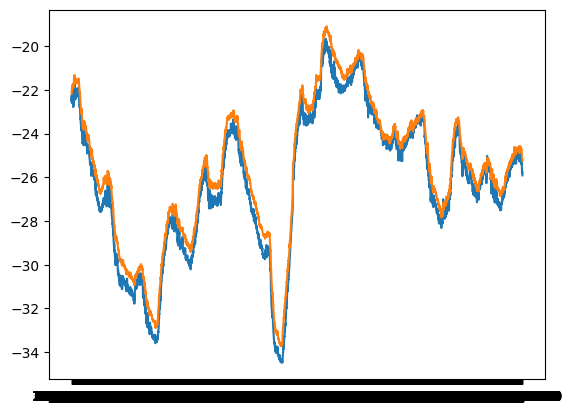

In [15]:
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P25'])

Graficar

Text(0.5, 0, 'time')

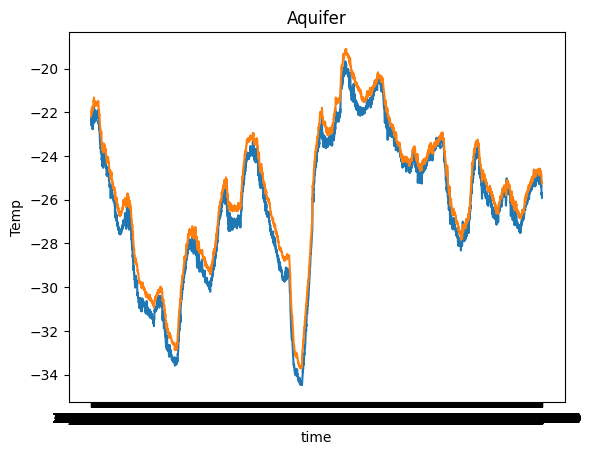

In [16]:
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P25'])
plt.title("Aquifer")
plt.ylabel("Temp")
plt.xlabel("time")

In [17]:
df2['time'] = pd.to_datetime(df2['Date'])


C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_4888\3431971326.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['time'] = pd.to_datetime(df2['Date'])


In [18]:
df2

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time
0,14/03/2006,-22.48,-22.18,2006-03-14
1,15/03/2006,-22.38,-22.14,2006-03-15
2,16/03/2006,-22.25,-22.04,2006-03-16
3,17/03/2006,-22.38,-22.04,2006-03-17
4,18/03/2006,-22.60,-22.04,2006-03-18
...,...,...,...,...
5218,26/06/2020,-25.68,-25.07,2020-06-26
5219,27/06/2020,-25.80,-25.11,2020-06-27
5220,28/06/2020,-25.80,-25.19,2020-06-28
5221,29/06/2020,-25.78,-25.18,2020-06-29


In [19]:
df2.dtypes

Date                                object
Depth_to_Groundwater_P24           float64
Depth_to_Groundwater_P25           float64
time                        datetime64[ns]
dtype: object

Pasar de string to datetime nos permite realizar operaciones sobre las fechas, como extarér el día, sumar etc..


In [20]:
print(df2['time'].min())
print(df2['time'].max()) # fecha más reciente en la base

2006-03-14 00:00:00
2020-06-30 00:00:00


In [21]:
df2['time'].max() - df2['time'].min() #timestamp, #timedelta

Timedelta('5222 days 00:00:00')

In [22]:
# Extaer información relevante para analizar, por ejempo los días, los meses, etc..
df2['day'] = df2['time'].dt.day

In [23]:
df2.tail()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day
5218,26/06/2020,-25.68,-25.07,2020-06-26,26
5219,27/06/2020,-25.80,-25.11,2020-06-27,27
5220,28/06/2020,-25.80,-25.19,2020-06-28,28
5221,29/06/2020,-25.78,-25.18,2020-06-29,29
5222,30/06/2020,-25.91,-25.25,2020-06-30,30


In [24]:
df2['day_name'] = df2['time'].dt.day_name()
# prueba con month, year

In [25]:
df2['day_name']

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4        Saturday
          ...    
5218       Friday
5219     Saturday
5220       Sunday
5221       Monday
5222      Tuesday
Name: day_name, Length: 5157, dtype: object

In [26]:
# analizar las transacciones en un día particiular puede ser importante...
# podriamos realziar un ejercicio de comparación usando ANOVA?
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
0,14/03/2006,-22.48,-22.18,2006-03-14,14,Tuesday
1,15/03/2006,-22.38,-22.14,2006-03-15,15,Wednesday
2,16/03/2006,-22.25,-22.04,2006-03-16,16,Thursday
3,17/03/2006,-22.38,-22.04,2006-03-17,17,Friday
4,18/03/2006,-22.60,-22.04,2006-03-18,18,Saturday


In [27]:
# promedio de cierre por día
df2.groupby([df2["time"].dt.day_name()])['Depth_to_Groundwater_P25'].mean()

time
Friday      -25.706653
Monday      -25.667106
Saturday    -25.705894
Sunday      -25.678449
Thursday    -25.691316
Tuesday     -25.683324
Wednesday   -25.692704
Name: Depth_to_Groundwater_P25, dtype: float64

In [28]:
# precio de cierre por mes y día de la semana
df2.groupby([df2["time"].dt.month, df2["time"].dt.day_name()])['Depth_to_Groundwater_P25'].mean()
# interesante observe el septimo mes en cada día

time  time     
1     Friday      -26.128710
      Monday      -26.185410
      Saturday    -26.204590
      Sunday      -26.182787
      Thursday    -26.258889
                     ...    
12    Saturday    -26.660476
      Sunday      -26.612540
      Thursday    -26.446271
      Tuesday     -26.476129
      Wednesday   -26.488333
Name: Depth_to_Groundwater_P25, Length: 84, dtype: float64

In [29]:
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
0,14/03/2006,-22.48,-22.18,2006-03-14,14,Tuesday
1,15/03/2006,-22.38,-22.14,2006-03-15,15,Wednesday
2,16/03/2006,-22.25,-22.04,2006-03-16,16,Thursday
3,17/03/2006,-22.38,-22.04,2006-03-17,17,Friday
4,18/03/2006,-22.60,-22.04,2006-03-18,18,Saturday


Text(0, 0.5, 'mean price')

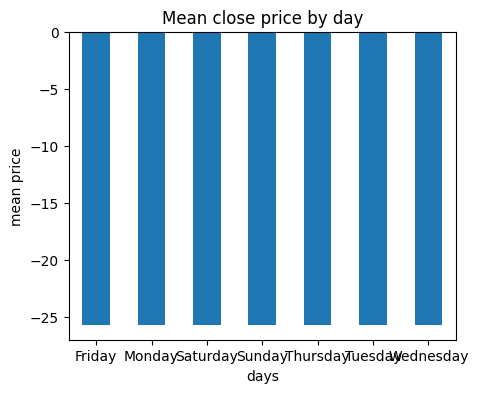

In [30]:
# gráficando el día
fig, axs = plt.subplots(figsize=(5,4))
df2.groupby(df2["time"].dt.day_name())["Depth_to_Groundwater_P25"].mean().plot(
    kind='bar', rot=0, ax=axs)
plt.title("Mean close price by day")
plt.xlabel("days")
plt.ylabel("mean price")

In [31]:
# datetime como index
df2.set_index(df2['time'], inplace=True) #Una ventaja  el ajuste de las fechas

In [32]:
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
time,,,,,,
2006-03-14,14/03/2006,-22.48,-22.18,2006-03-14,14,Tuesday
2006-03-15,15/03/2006,-22.38,-22.14,2006-03-15,15,Wednesday
2006-03-16,16/03/2006,-22.25,-22.04,2006-03-16,16,Thursday
2006-03-17,17/03/2006,-22.38,-22.04,2006-03-17,17,Friday
2006-03-18,18/03/2006,-22.60,-22.04,2006-03-18,18,Saturday


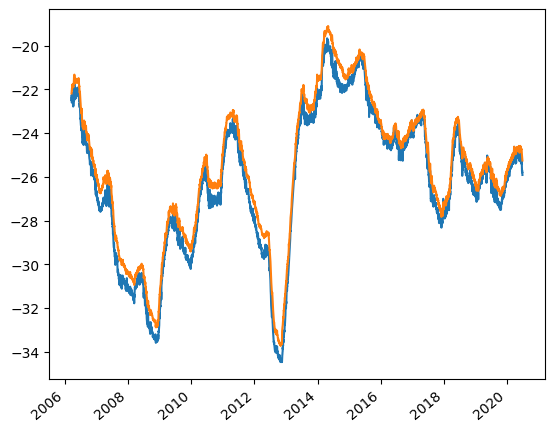

In [33]:
plt.plot(df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Depth_to_Groundwater_P25'])
plt.xticks(rotation=40, ha='right'); #not show text

In [34]:
# determinando el índice podemos usar el slicing...
df2['2006-05-18':'2006-06-18']
df2.tail()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
time,,,,,,
2020-06-26,26/06/2020,-25.68,-25.07,2020-06-26,26,Friday
2020-06-27,27/06/2020,-25.80,-25.11,2020-06-27,27,Saturday
2020-06-28,28/06/2020,-25.80,-25.19,2020-06-28,28,Sunday
2020-06-29,29/06/2020,-25.78,-25.18,2020-06-29,29,Monday
2020-06-30,30/06/2020,-25.91,-25.25,2020-06-30,30,Tuesday


<Axes: xlabel='time'>

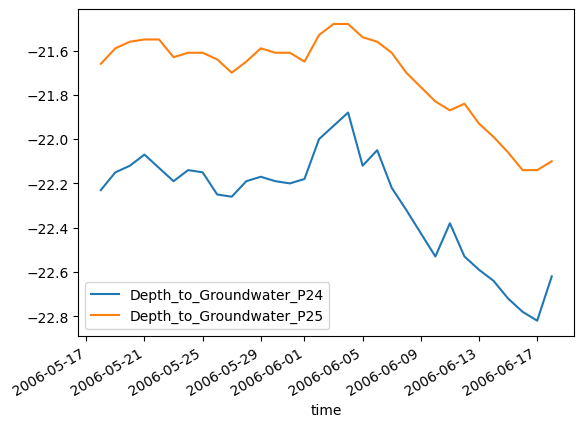

In [35]:
df2['2006-05-18':'2006-06-18'][['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].plot()

In [36]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


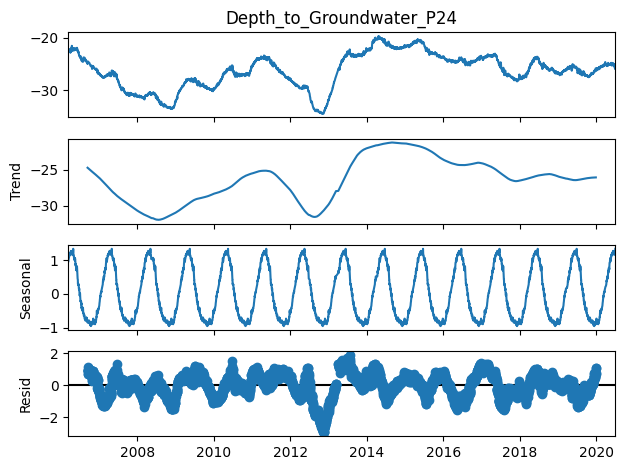

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df2['Depth_to_Groundwater_P24'].dropna(), model='additive', period=365)
decomposition.plot()
plt.show()

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

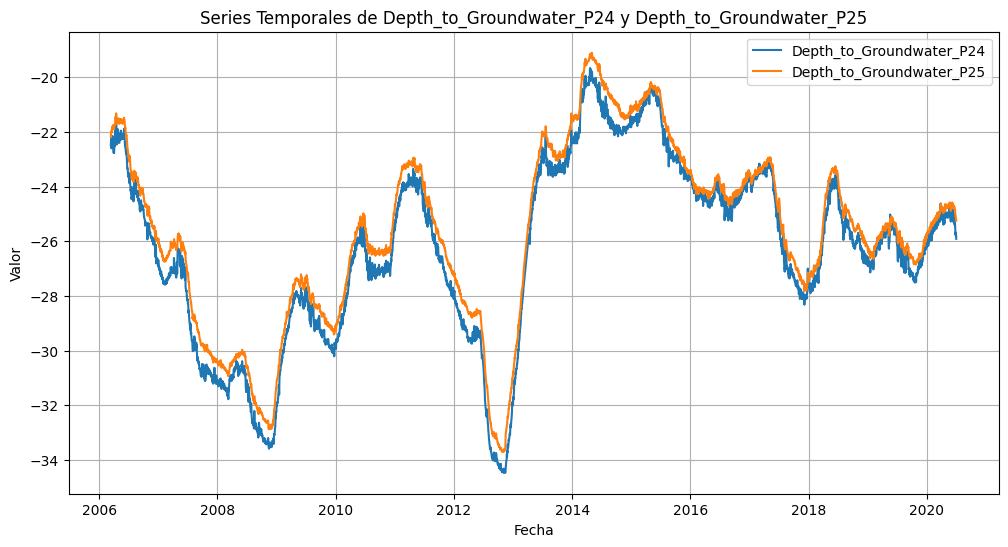

In [39]:
# Graficar Column1 y Column2 en función de Date
plt.figure(figsize=(12,6))
plt.plot(df2['time'], df2['Depth_to_Groundwater_P24'], label='Depth_to_Groundwater_P24')
plt.plot(df2['time'], df2['Depth_to_Groundwater_P25'], label='Depth_to_Groundwater_P25')
plt.title("Series Temporales de Depth_to_Groundwater_P24 y Depth_to_Groundwater_P25")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Crear la serie lagged
lagged = np.zeros(len(df2))  # inicializamos con ceros
init = 9.4

In [41]:
print(pd.DataFrame(lagged))

        0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
5152  0.0
5153  0.0
5154  0.0
5155  0.0
5156  0.0

[5157 rows x 1 columns]


In [42]:
for i in range(len(df2)):
    lagged[i] = init + np.random.normal(0, 3)
    init = lagged[i]

# Agregamos la serie al DataFrame
df2['Lagged'] = lagged

In [43]:
print(pd.DataFrame(df2))
print(pd.DataFrame(lagged))

                  Date  Depth_to_Groundwater_P24  Depth_to_Groundwater_P25  \
time                                                                         
2006-03-14  14/03/2006                    -22.48                    -22.18   
2006-03-15  15/03/2006                    -22.38                    -22.14   
2006-03-16  16/03/2006                    -22.25                    -22.04   
2006-03-17  17/03/2006                    -22.38                    -22.04   
2006-03-18  18/03/2006                    -22.60                    -22.04   
...                ...                       ...                       ...   
2020-06-26  26/06/2020                    -25.68                    -25.07   
2020-06-27  27/06/2020                    -25.80                    -25.11   
2020-06-28  28/06/2020                    -25.80                    -25.19   
2020-06-29  29/06/2020                    -25.78                    -25.18   
2020-06-30  30/06/2020                    -25.91                

In [44]:
# ---- Nueva parte: añadir tendencia ----
t_index = np.arange(len(df2))  # índice numérico de 0 a 99
df2['Depth_to_Groundwater_P24_trend'] = df2['Depth_to_Groundwater_P24'] + (0.3 * t_index)

In [45]:
print(pd.DataFrame(t_index))
print(pd.DataFrame(df2))

         0
0        0
1        1
2        2
3        3
4        4
...    ...
5152  5152
5153  5153
5154  5154
5155  5155
5156  5156

[5157 rows x 1 columns]
                  Date  Depth_to_Groundwater_P24  Depth_to_Groundwater_P25  \
time                                                                         
2006-03-14  14/03/2006                    -22.48                    -22.18   
2006-03-15  15/03/2006                    -22.38                    -22.14   
2006-03-16  16/03/2006                    -22.25                    -22.04   
2006-03-17  17/03/2006                    -22.38                    -22.04   
2006-03-18  18/03/2006                    -22.60                    -22.04   
...                ...                       ...                       ...   
2020-06-26  26/06/2020                    -25.68                    -25.07   
2020-06-27  27/06/2020                    -25.80                    -25.11   
2020-06-28  28/06/2020                    -25.80               

In [46]:
n = len(df2)
y1 = np.random.normal(0, 5, n//2)
y2 = np.random.normal(0, 30, n - n//2)  # el resto para empatar la longitud
yhet = np.append(y1, y2)

df2['Hetero'] = yhet

In [47]:
print(pd.DataFrame(yhet))

              0
0     -1.185566
1     -0.962364
2     -4.095421
3     -0.831559
4     -2.403700
...         ...
5152  76.226861
5153 -21.346598
5154   3.293737
5155 -13.984073
5156 -13.984487

[5157 rows x 1 columns]


In [48]:
df2

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name,Lagged,Depth_to_Groundwater_P24_trend,Hetero
time,,,,,,,,,
2006-03-14,14/03/2006,-22.48,-22.18,2006-03-14,14,Tuesday,4.855450,-22.48,-1.185566
2006-03-15,15/03/2006,-22.38,-22.14,2006-03-15,15,Wednesday,3.183770,-22.08,-0.962364
2006-03-16,16/03/2006,-22.25,-22.04,2006-03-16,16,Thursday,4.133235,-21.65,-4.095421
2006-03-17,17/03/2006,-22.38,-22.04,2006-03-17,17,Friday,4.998236,-21.48,-0.831559
2006-03-18,18/03/2006,-22.60,-22.04,2006-03-18,18,Saturday,5.982635,-21.40,-2.403700
...,...,...,...,...,...,...,...,...,...
2020-06-26,26/06/2020,-25.68,-25.07,2020-06-26,26,Friday,278.064045,1519.92,76.226861
2020-06-27,27/06/2020,-25.80,-25.11,2020-06-27,27,Saturday,277.915999,1520.10,-21.346598
2020-06-28,28/06/2020,-25.80,-25.19,2020-06-28,28,Sunday,282.043941,1520.40,3.293737


In [49]:
# Serie estacional (nueva)
df2['Seasonal'] = 7 + np.cos(t_index * 0.17) * 1.3
df2

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name,Lagged,Depth_to_Groundwater_P24_trend,Hetero,Seasonal
time,,,,,,,,,,
2006-03-14,14/03/2006,-22.48,-22.18,2006-03-14,14,Tuesday,4.855450,-22.48,-1.185566,8.300000
2006-03-15,15/03/2006,-22.38,-22.14,2006-03-15,15,Wednesday,3.183770,-22.08,-0.962364,8.281260
2006-03-16,16/03/2006,-22.25,-22.04,2006-03-16,16,Thursday,4.133235,-21.65,-4.095421,8.225581
2006-03-17,17/03/2006,-22.38,-22.04,2006-03-17,17,Friday,4.998236,-21.48,-0.831559,8.134568
2006-03-18,18/03/2006,-22.60,-22.04,2006-03-18,18,Saturday,5.982635,-21.40,-2.403700,8.010845
...,...,...,...,...,...,...,...,...,...,...
2020-06-26,26/06/2020,-25.68,-25.07,2020-06-26,26,Friday,278.064045,1519.92,76.226861,5.976487
2020-06-27,27/06/2020,-25.80,-25.11,2020-06-27,27,Saturday,277.915999,1520.10,-21.346598,5.855640
2020-06-28,28/06/2020,-25.80,-25.19,2020-06-28,28,Sunday,282.043941,1520.40,3.293737,5.767785


In [50]:
# Extraer componentes
ytrend = decomposition.trend
ysea = decomposition.seasonal
yhet = decomposition.resid   # residuo = ruido no explicado
y = df2['Depth_to_Groundwater_P24'].mean()    # nivel promedio

In [51]:
ytrend

time
2006-03-14   NaN
2006-03-15   NaN
2006-03-16   NaN
2006-03-17   NaN
2006-03-18   NaN
              ..
2020-06-26   NaN
2020-06-27   NaN
2020-06-28   NaN
2020-06-29   NaN
2020-06-30   NaN
Name: trend, Length: 5157, dtype: float64

In [52]:
ysea

time
2006-03-14    0.968174
2006-03-15    0.986319
2006-03-16    1.022945
2006-03-17    1.045729
2006-03-18    1.057779
                ...   
2020-06-26    1.219198
2020-06-27    1.210053
2020-06-28    1.210165
2020-06-29    1.311765
2020-06-30    1.334108
Name: seasonal, Length: 5157, dtype: float64

In [53]:
yhet

time
2006-03-14   NaN
2006-03-15   NaN
2006-03-16   NaN
2006-03-17   NaN
2006-03-18   NaN
              ..
2020-06-26   NaN
2020-06-27   NaN
2020-06-28   NaN
2020-06-29   NaN
2020-06-30   NaN
Name: resid, Length: 5157, dtype: float64

In [54]:
y

-26.273224743067672

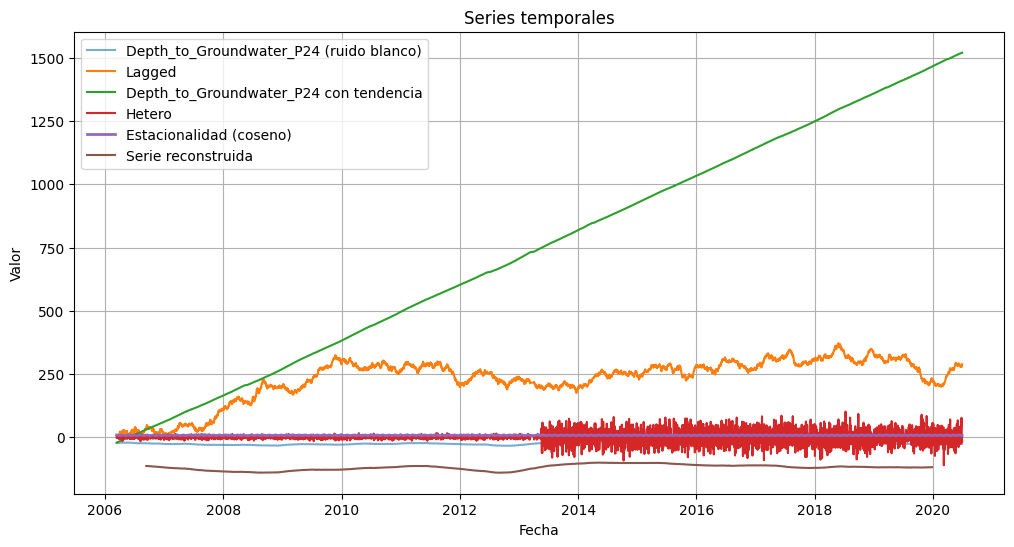

In [55]:
# Graficar Column1 y Column1 con tendencia
plt.figure(figsize=(12,6))
plt.plot(df2['time'], df2['Depth_to_Groundwater_P24'], label='Depth_to_Groundwater_P24 (ruido blanco)', alpha=0.6)
plt.plot(df2['time'], df2['Lagged'], label='Lagged')
plt.plot(df2['time'], df2['Depth_to_Groundwater_P24_trend'], label='Depth_to_Groundwater_P24 con tendencia')
plt.plot(df2['time'], df2['Hetero'], label='Hetero')
plt.plot(df2['time'], df2['Seasonal'], label='Estacionalidad (coseno)', linewidth=2)
plt.plot(df2.index, ysea + ytrend*3.56 + y + yhet, label="Serie reconstruida")
plt.title("Series temporales")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
from statsmodels.graphics.tsaplots import plot_acf

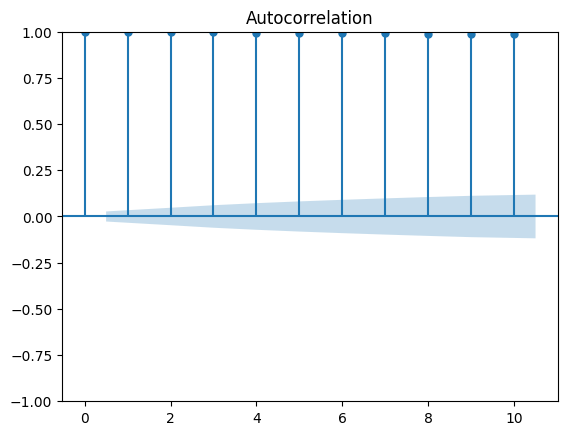

In [57]:
plot_acf(lagged, lags=10);

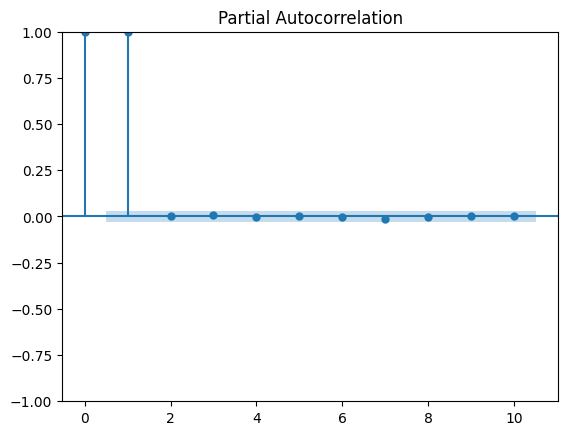

In [58]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lagged, lags=10);  # Plot for the first 20 lags

In [59]:
# Serie original
y = df2['Depth_to_Groundwater_P24'].values

# Dividir en 10 bloques y calcular estadísticas
splits = np.array_split(y, 10)   # uso array_split porque maneja mejor si no se divide exacto
print("Análisis de la serie original (Depth_to_Groundwater_P24):")
for i, block in enumerate(splits, 1):
    print(f"Bloque {i}: media={np.mean(block):.2f}, std={np.std(block):.2f}")

print("--"*20)

# Serie de tendencia obtenida en la descomposición
ytrend = decomposition.trend.dropna().values  # quitar NaN en los extremos
splits_trend = np.array_split(ytrend, 10)

print("Análisis de la tendencia (Depth_to_Groundwater_P24):")
for i, block in enumerate(splits_trend, 1):
    print(f"Bloque {i}: media={np.mean(block):.2f}, std={np.std(block):.2f}")

Análisis de la serie original (Depth_to_Groundwater_P24):
Bloque 1: media=-25.60, std=2.16
Bloque 2: media=-31.61, std=1.03
Bloque 3: media=-28.48, std=1.23
Bloque 4: media=-25.69, std=1.32
Bloque 5: media=-30.26, std=2.80
Bloque 6: media=-22.05, std=1.18
Bloque 7: media=-22.33, std=1.25
Bloque 8: media=-24.38, std=0.88
Bloque 9: media=-26.29, std=1.27
Bloque 10: media=-26.04, std=0.73
----------------------------------------
Análisis de la tendencia (Depth_to_Groundwater_P24):
Bloque 1: media=-27.93, std=1.82
Bloque 2: media=-31.16, std=0.65
Bloque 3: media=-28.20, std=0.83
Bloque 4: media=-25.85, std=0.72
Bloque 5: media=-29.84, std=1.40
Bloque 6: media=-22.55, std=1.44
Bloque 7: media=-22.03, std=0.74
Bloque 8: media=-24.24, std=0.22
Bloque 9: media=-26.03, std=0.43
Bloque 10: media=-26.10, std=0.27


In [60]:
[np.mean(block) for block in splits]

[-25.601492248062016,
 -31.60943798449612,
 -28.479767441860464,
 -25.692538759689924,
 -30.256085271317833,
 -22.05133720930233,
 -22.333372093023257,
 -24.37978640776699,
 -26.288796116504855,
 -26.035533980582525]

In [61]:
mean_blocks = np.array([np.mean(block) for block in splits])
print(pd.DataFrame(mean_blocks))

           0
0 -25.601492
1 -31.609438
2 -28.479767
3 -25.692539
4 -30.256085
5 -22.051337
6 -22.333372
7 -24.379786
8 -26.288796
9 -26.035534


In [62]:
splits_trend = np.array_split(ytrend, 10)
mean_trend_blocks = np.array([np.mean(block) for block in splits_trend])

In [63]:
splits_trend = pd.DataFrame(splits_trend)
splits_trend

,0,1,2,3,4,5,6,7,8,9,...,470,471,472,473,474,475,476,477,478,479
0,-24.726849,-24.739918,-24.753041,-24.765918,-24.778575,-24.790904,-24.803781,-24.816301,-24.829288,-24.842000,...,-30.701945,-30.711315,-30.720137,-30.729315,-30.738767,-30.748301,-30.757315,-30.766247,-30.775233,-30.784658
1,-30.793945,-30.802877,-30.811836,-30.820822,-30.829425,-30.837370,-30.845671,-30.854082,-30.862712,-30.872164,...,-29.688521,-29.678575,-29.668904,-29.659123,-29.649096,-29.639288,-29.629096,-29.618822,-29.608329,-29.597671
2,-29.586658,-29.576192,-29.565616,-29.555178,-29.544932,-29.535041,-29.525397,-29.515342,-29.505479,-29.495671,...,-26.424164,-26.412466,-26.400137,-26.388411,-26.377096,-26.365562,-26.354000,-26.342904,-26.332000,-26.321315
3,-26.310438,-26.299562,-26.289041,-26.278164,-26.267233,-26.256411,-26.245534,-26.234685,-26.223753,-26.213397,...,-27.690356,-27.705534,-27.720411,-27.735260,-27.751616,-27.768027,-27.785233,-27.803233,-27.821233,NaN
4,-27.840356,-27.859973,-27.879479,-27.899205,-27.919096,-27.938137,-27.957452,-27.976575,-27.996164,-28.015808,...,-26.756712,-26.726986,-26.697123,-26.667096,-26.636986,-26.607068,-26.576740,-26.546164,-26.515014,NaN
5,-26.484247,-26.452986,-26.421562,-26.390329,-26.358822,-26.327616,-26.296575,-26.265342,-26.233808,-26.201973,...,-21.238877,-21.239479,-21.240411,-21.240877,-21.242329,-21.242712,-21.244247,-21.245726,-21.246767,NaN
6,-21.247233,-21.248301,-21.248685,-21.250630,-21.253096,-21.255945,-21.257452,-21.258493,-21.259452,-21.261753,...,-23.640137,-23.648055,-23.655562,-23.663068,-23.670603,-23.678164,-23.685836,-23.693918,-23.701315,NaN
7,-23.708329,-23.713945,-23.719041,-23.723781,-23.728712,-23.734027,-23.739589,-23.745781,-23.753205,-23.759808,...,-24.813836,-24.822411,-24.831041,-24.840438,-24.849836,-24.859288,-24.868877,-24.878164,-24.887260,NaN
8,-24.896301,-24.905726,-24.915808,-24.926247,-24.936110,-24.946000,-24.956110,-24.966110,-24.976000,-24.985589,...,-25.680685,-25.677562,-25.675068,-25.672685,-25.670438,-25.667479,-25.665178,-25.663397,-25.661753,NaN
9,-25.658959,-25.655452,-25.651753,-25.648329,-25.644658,-25.641890,-25.640219,-25.638740,-25.636247,-25.633973,...,-26.072986,-26.072356,-26.072247,-26.072466,-26.072932,-26.073205,-26.073397,-26.073425,-26.073863,NaN


In [64]:
mean_trend_blocks = pd.DataFrame(mean_trend_blocks)
mean_trend_blocks

,0
0,-27.929334
1,-31.160070
2,-28.198965
3,-25.849924
4,-29.840906
5,-22.546638
6,-22.032130
7,-24.238533
8,-26.031033
9,-26.098342


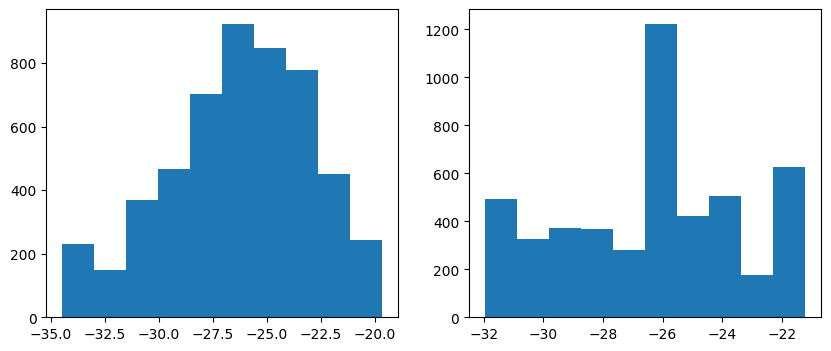

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
axes[0].hist(y) # White noise
axes[1].hist(ytrend) # trend - uniform!
plt.show()

In [66]:
import pandas as pd

In [67]:
from pmdarima import auto_arima

c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\compat\sklearn.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [68]:
from pmdarima import auto_arima

In [ ]:
modelo = auto_arima(df2['Depth_to_Groundwater_P24'], seasonal=False,
                    stepwise=True,
                    trace=True)
print(modelo.summary())

c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Angel Resendiz Plat

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6533.449, Time=13.75 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6399.574, Time=0.85 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6437.534, Time=0.48 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6447.275, Time=1.05 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6401.439, Time=1.23 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6500.439, Time=4.09 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6501.848, Time=4.42 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-6498.841, Time=8.89 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-6497.728, Time=13.68 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6490.386, Time=11.50 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-6499.694, Time=7.30 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6501.802, Time=6.58 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-6529.627, Time=17.12 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-6535.241, Time=3.22 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6502.206, Time=1.90 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-6503.615, Time=1.36 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-6500.608, Time=2.55 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-6559.471, Time=6.09 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-6501.460, Time=2.32 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=-6531.420, Time=8.65 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0]             : AIC=-6601.772, Time=9.39 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=-6632.402, Time=5.53 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0]             : AIC=-6501.480, Time=0.93 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,5)(0,0,0)[0]             : AIC=-6641.129, Time=6.05 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,5)(0,0,0)[0]             : AIC=-6501.086, Time=1.63 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(0,0,0)[0]             : AIC=-6589.365, Time=11.64 sec


c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=-6549.674, Time=15.15 sec

Best model:  ARIMA(1,1,5)(0,0,0)[0]          
Total fit time: 167.464 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5157
Model:               SARIMAX(1, 1, 5)   Log Likelihood                3327.565
Date:                Fri, 22 Aug 2025   AIC                          -6641.129
Time:                        21:16:58   BIC                          -6595.294
Sample:                             0   HQIC                         -6625.090
                               - 5157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9878      0.004    259.097      0.000       0.

c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Angel Resendiz Plat

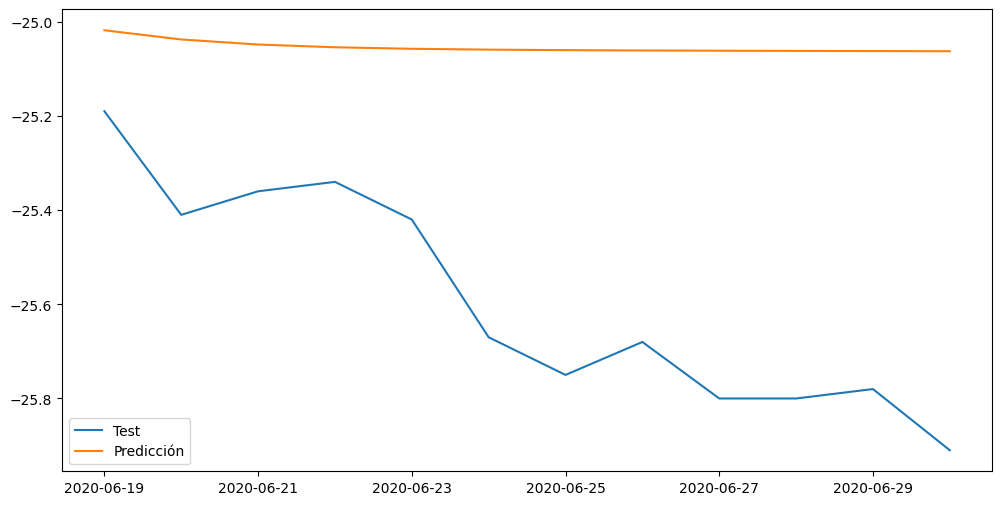

In [71]:
train = df2.iloc[:-12]  # Todo menos los últimos 12 meses
test = df2.iloc[-12:]   # Últimos 12 meses

modelo = auto_arima(train['Depth_to_Groundwater_P24'], seasonal=False, stepwise=True)
predicciones = modelo.predict(n_periods=len(test))

# Comparar visualmente
plt.figure(figsize=(12,6))
plt.plot(test.index, test['Depth_to_Groundwater_P24'], label="Test")
plt.plot(test.index, predicciones, label="Predicción")
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(test['Depth_to_Groundwater_P24'], predicciones))
print(f"RMSE: {rmse}")

RMSE: 0.5798038668147325


In [74]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['Depth_to_Groundwater_P24'], predicciones)

0.5388176396390968

In [76]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['Depth_to_Groundwater_P24'], predicciones)

0.020981887486995972

In [77]:
forecast = modelo.predict(3)

c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Angel Resendiz Plata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [78]:
forecast

5145   -25.018076
5146   -25.037576
5147   -25.048341
dtype: float64